The code below is used to normalize the data because I noticed some inconsistencies in the letter casing of the song names and artist names. You can consider this as the transformation process of this stage.

With the use of PySpark, I initialized a session to start. Then I loaded the data from the CSV file using the spark.read.csv function. The star of the show is the transformation step where I changed the letter casing of the artist and track names to be capitalized using the initcap() function. Finally, I printed the first 20 rows using the show() method.

In [59]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import expr

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("SpotifyDataNormalization") \
    .getOrCreate()

historical_tracks_file = "all_recent_tracks.csv"
df = spark.read.csv(historical_tracks_file, header=True, inferSchema=True)

df = df.withColumn('track_name', expr("initcap(track_name)"))
df = df.withColumn('artist_name', expr("initcap(artist_name)"))
df.show()


+--------------------+---------------+--------------------+
|          track_name|    artist_name|           played_at|
+--------------------+---------------+--------------------+
|         Someone New|         Laufey|2025-02-03 05:42:...|
|     I Wish You Love|         Laufey|2025-02-03 05:45:...|
|No One Knows (wit...|Stephen Sanchez|2025-02-03 05:49:...|
|     Like The Movies|         Laufey|2025-02-03 05:52:...|
|               James|         Laufey|2025-02-03 05:55:...|
|             Fragile|         Laufey|2025-02-03 05:59:...|
|              Yeshua|   Minister Guc|2025-02-03 19:58:...|
|       Rahama (live)|     Kaestrings|2025-02-03 20:08:...|
|Dancin - Krono Remix|    Aaron Smith|2025-02-04 01:22:...|
|              Te Amo|       121selah|2025-02-04 01:25:...|
|Mr Right (with Me...|   Mae Stephens|2025-02-04 01:28:...|
|             Alright|    Sam Fischer|2025-02-04 01:30:...|
|Intro (end Of The...|  Ariana Grande|2025-02-04 01:31:...|
|              God Is|     Kanye West|20

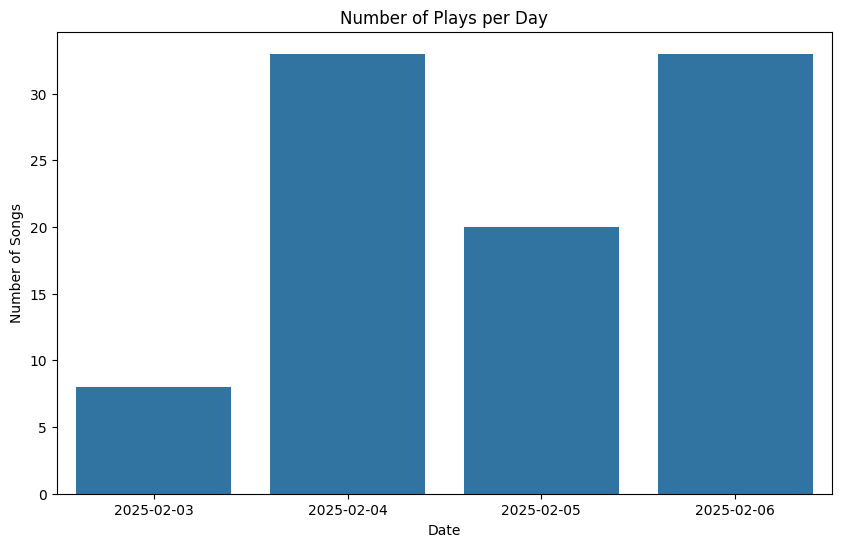

In [60]:
from pyspark.sql.functions import to_date, count
import matplotlib.pyplot as plt
import seaborn as sns

# Convert played_at to date
df = df.withColumn('Day', to_date('played_at'))

# Filter by Day: Count the number of plays per day
filtered_by_day = df.groupBy('Day').agg(count('track_name').alias('No of songs'))

# Convert to pandas DataFrame for visualization
filtered_by_day_pd = filtered_by_day.toPandas()

# Sort the DataFrame by 'Day'
filtered_by_day_pd = filtered_by_day_pd.sort_values(by='Day')

# Visualize the data
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_by_day_pd, x='Day', y='No of songs')
plt.title('Number of Plays per Day')
plt.xticks(rotation=0)
plt.xlabel('Date')
plt.ylabel('Number of Songs')
plt.show()



So, according to the data, I went on a musical binge on the 4th of February, jamming to over 30 songs. Weird, I could have sworn the 5th was my day. Guess my memory got remixed— DATA never lies!
But then this is subject to change.

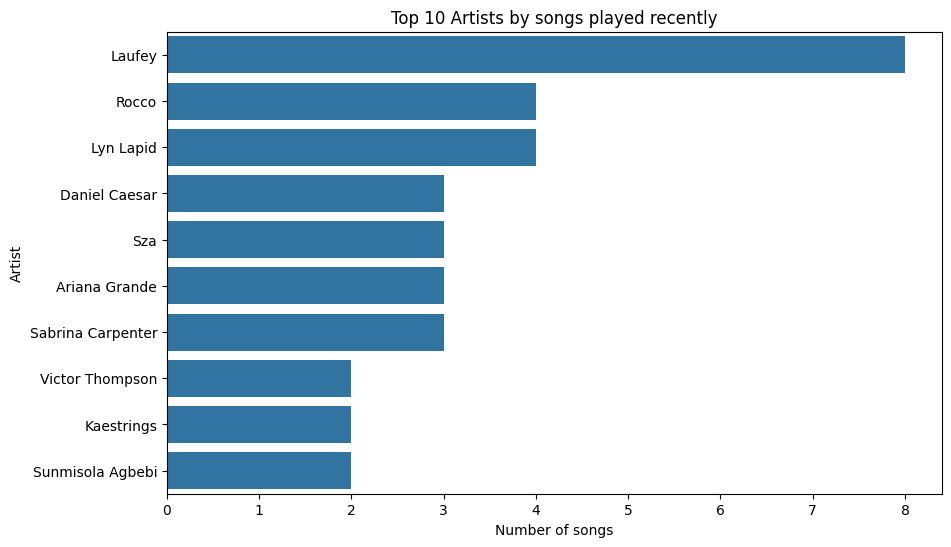

In [61]:
from pyspark.sql.functions import count
import matplotlib.pyplot as plt
import seaborn as sns

artist_tracks = df.groupBy('artist_name').agg(count('track_name').alias('songs'))

artist_tracks_pd = artist_tracks.toPandas()

top_artists_pd = artist_tracks_pd.sort_values(by='songs', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_artists_pd, x='songs', y='artist_name')
plt.title('Top 10 Artists by songs played recently')
plt.xlabel('Number of songs')
plt.ylabel('Artist')
plt.show()


Now this, this I agree with because I am a Laufey girly by heart. And I hope it doesn't change fingers-crossed.

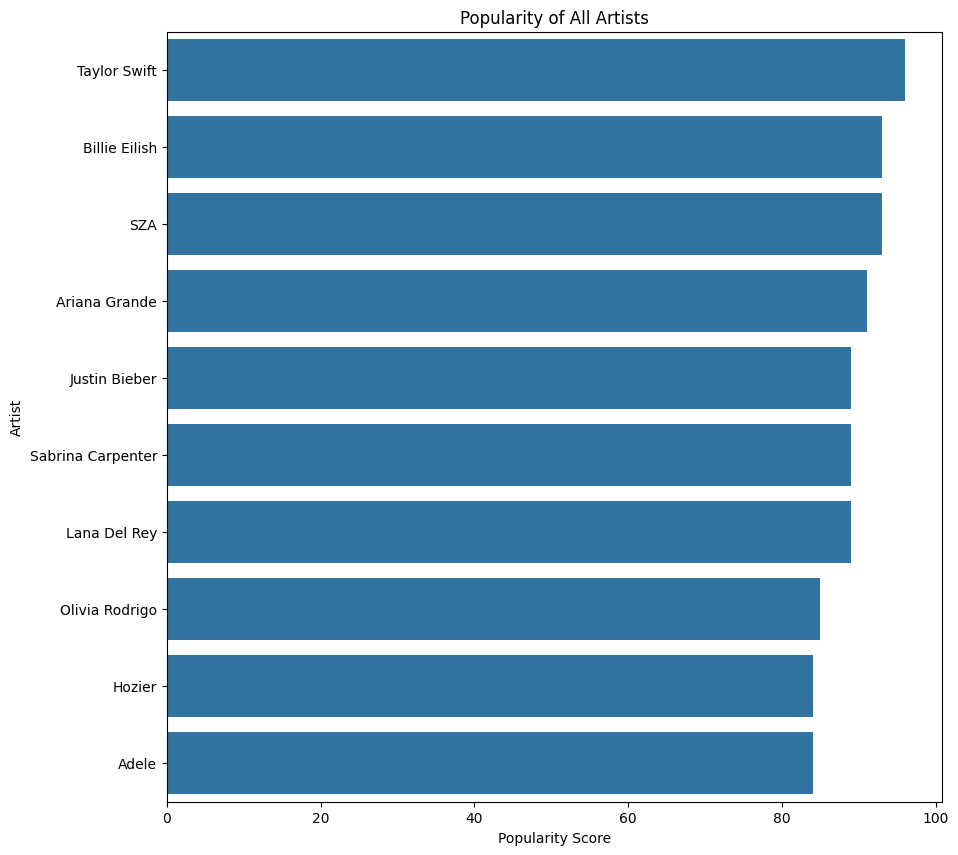

In [62]:
from pyspark.sql import SparkSession

# Initialize Spark Session
spark2 = SparkSession.builder \
    .appName("SpotifyDataFiltering1") \
    .getOrCreate()

historical_tracks_file = "all_top_artists.csv"
df1 = spark2.read.csv(historical_tracks_file, header=True, inferSchema=True)

artist_popularity_pd = df1.select('Artistname', 'FamousLevel').toPandas()

artist_popularity_pd = artist_popularity_pd.sort_values(by='FamousLevel', ascending=False).head(10)

# Visualize the popularity of all artists
plt.figure(figsize=(10, 10))
sns.barplot(data=artist_popularity_pd, y='Artistname', x='FamousLevel')
plt.title('Popularity of All Artists')
plt.xlabel('Popularity Score')
plt.ylabel('Artist')

plt.show()

Well, given my most listened artists, it's evident that I am not a sucker for mainstream, very popular musicians. My most listened-to artist is 6th on the popularity list. Regardless, she is good at what she does.

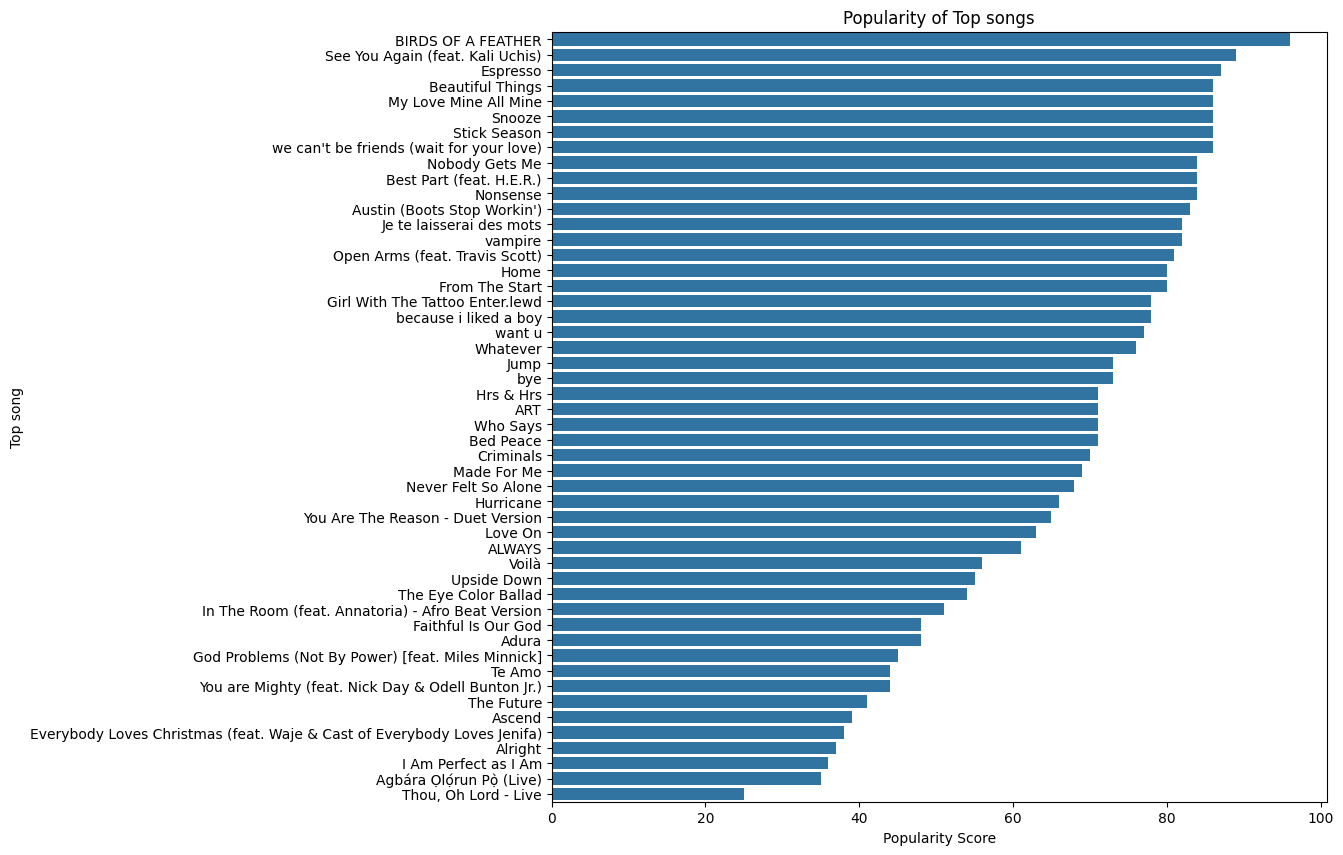

In [66]:
from pyspark.sql import SparkSession

# Initialize Spark Session
spark3 = SparkSession.builder \
    .appName("SpotifyDataFiltering2") \
    .getOrCreate()

historical_tracks_file = "all_top_tracks.csv"
df2 = spark3.read.csv(historical_tracks_file, header=True, inferSchema=True)

tracks_popularity_pd = df2.select('track_name','popularity').toPandas()

tracks_popularity_pd = tracks_popularity_pd.sort_values(by='popularity', ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(data=tracks_popularity_pd, x= 'popularity', y= 'track_name')
plt.title('Popularity of Top songs')
plt.xlabel('Popularity Score')
plt.ylabel('Top song')

plt.show()

Well, that's something you don't see every day! Most of my top songs are flying under the radar with popularity scores below 80, and the real gems are tucked away below 50. Even if they aren't chart-toppers, they've got that special something. It's like finding hidden treasures in a musical sea—I wouldn't trade them for anything!

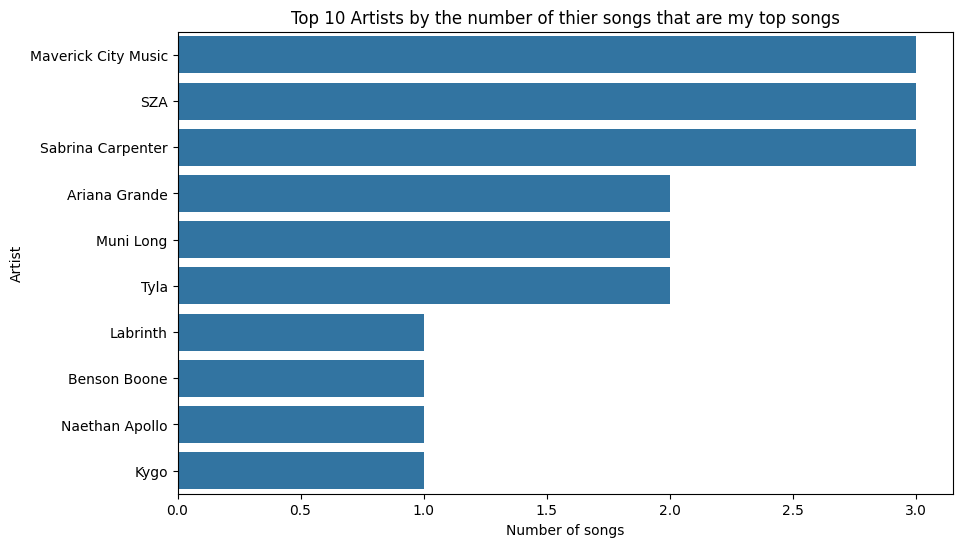

In [64]:
from pyspark.sql.functions import count
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

artist_top_track = df2.groupBy('artist_name').agg(count('track_name').alias('songs'))

artist_top_track_pd = artist_top_track.toPandas()

artist_top_track_pd = artist_top_track_pd.sort_values(by='songs', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=artist_top_track_pd, x='songs', y='artist_name')
plt.title('Top 10 Artists by the number of thier songs that are my top songs')
plt.xlabel('Number of songs')
plt.ylabel('Artist')
plt.show()

Alright, reality check: No sign of Laufey in the top slots... yet. But let's be honest—at the rate I'm obsessively listening to her, it's only a matter of time before she climbs up there. Seriously, her tunes have me hitting repeat like it's a reflex.